# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [2]:
import numpy as np
#1
affitto = np.array([720, 980, 650, 1200], dtype=float)
#2
somma1 = sum(affitto)
print(somma1)
#3

affitto[3] += affitto[3] * 0.12
print(affitto)

#7
somma3 = sum(affitto)
a = (somma3 - somma1)/somma1 * 100
print(round(a, 4),"%")

#4
affitto[2] += (-affitto[2] * 0.1 )
print(affitto)

#5
affitto[0:2] += affitto[0:2] * 0.05  
print(affitto)

somma2 = sum(affitto)
print(somma2)



3550.0
[ 720.  980.  650. 1344.]
4.0563 %
[ 720.  980.  585. 1344.]
[ 756. 1029.  585. 1344.]
3714.0


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

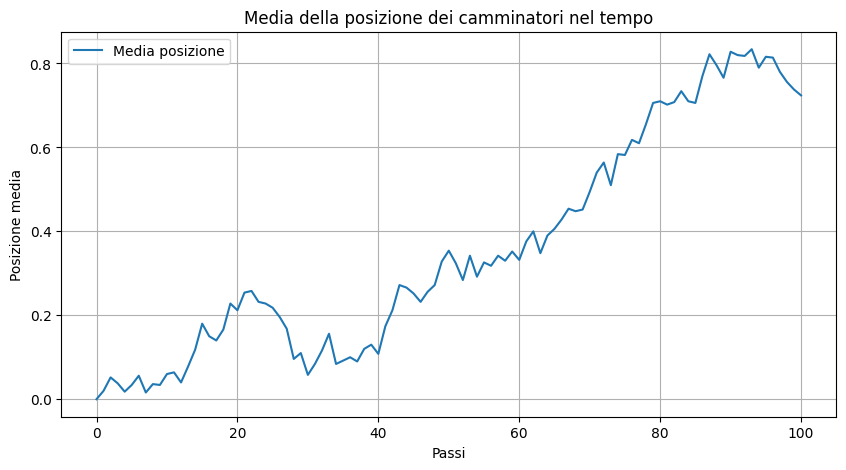

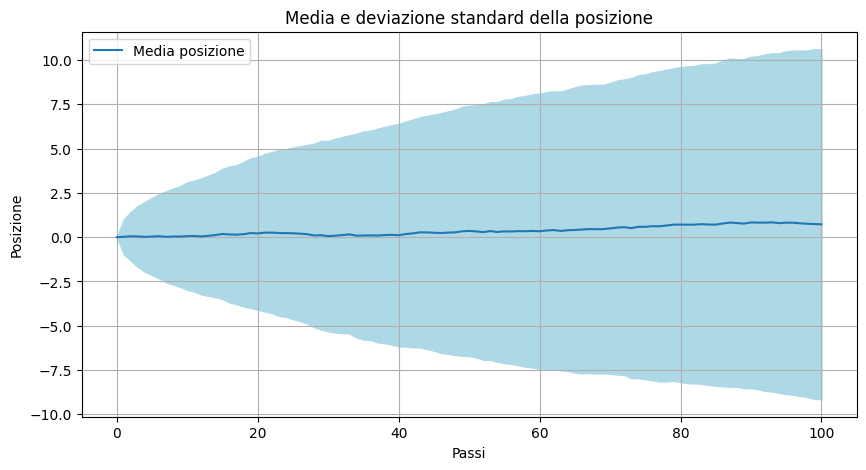

In [3]:
import numpy as np

def random_walk_1d(n_steps, n_walkers):
    # Ogni passo è +1 o -1, con probabilità uguale (50%)
    steps = np.random.choice([-1, 1], size=(n_walkers, n_steps))
    
    # Somma cumulativa dei passi lungo l'asse delle colonne (i passi nel tempo)
    positions = np.cumsum(steps, axis=1)
    
    # Aggiungiamo lo zero iniziale (posizione di partenza)
    positions = np.hstack([np.zeros((n_walkers, 1)), positions])
    
    # Calcolo media e deviazione standard per ogni passo (sull'asse dei camminatori)
    mean_positions = np.mean(positions, axis=0)
    std_positions = np.std(positions, axis=0)

    return mean_positions, std_positions

import matplotlib.pyplot as plt

# Parametri
n_steps = 100
n_walkers = 1000

# Simulazione
mean_pos, std_pos = random_walk_1d(n_steps, n_walkers)

# Plot media
plt.figure(figsize=(10, 5))
plt.plot(mean_pos, label='Media posizione')
plt.title("Media della posizione dei camminatori nel tempo")
plt.xlabel("Passi")
plt.ylabel("Posizione media")
plt.grid(True)
plt.legend()
plt.show()

# Plot con deviazione standard
plt.figure(figsize=(10, 5))
plt.plot(mean_pos, label='Media posizione')
plt.fill_between(range(n_steps + 1), mean_pos - std_pos, mean_pos + std_pos,
                 color='lightblue')
plt.title("Media e deviazione standard della posizione")
plt.xlabel("Passi")
plt.ylabel("Posizione")
plt.grid(True)
plt.legend()
plt.show()



## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [6]:
import numpy as np

np.random.seed(42)

a = np.random.normal(loc=0, scale=1, size=(5, 9))
x = np.zeros(5)
for i in range(5):
    min = abs(a[i, 0])
    for j in range(9):
        if abs(a[i, j]) < min:
            min = abs(a[i, j])
    x[i] = min

print("Array a:\n", a)
print("\nMinimi valori assoluti per riga:\n", x)

Array a:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]

Minimi valori assoluti per riga:
 [0.1382643  0.24196227 0.0675282  0.01349722 0.11564828]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


29.69911764705882
34.694514005602244
0.5126050420168067
    PassengerId  Survived  Pclass                             Name     Sex   
68           69         1       3  Andersson, Miss. Erna Alexandra  female  \

     Age  SibSp  Parch   Ticket   Fare Cabin Embarked  Family_index  
68  17.0      4      2  3101281  7.925   NaN        S      0.757098  


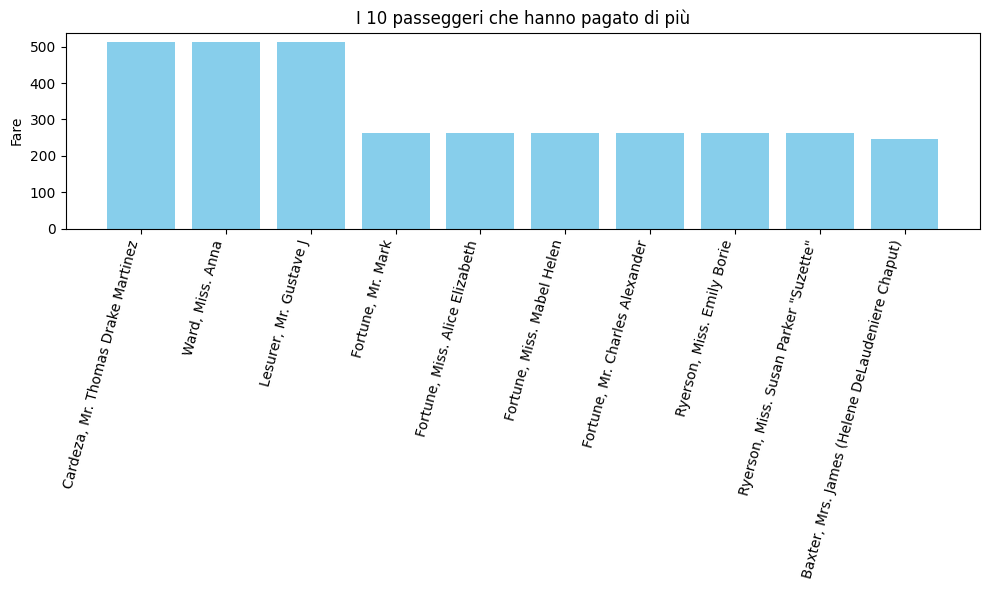

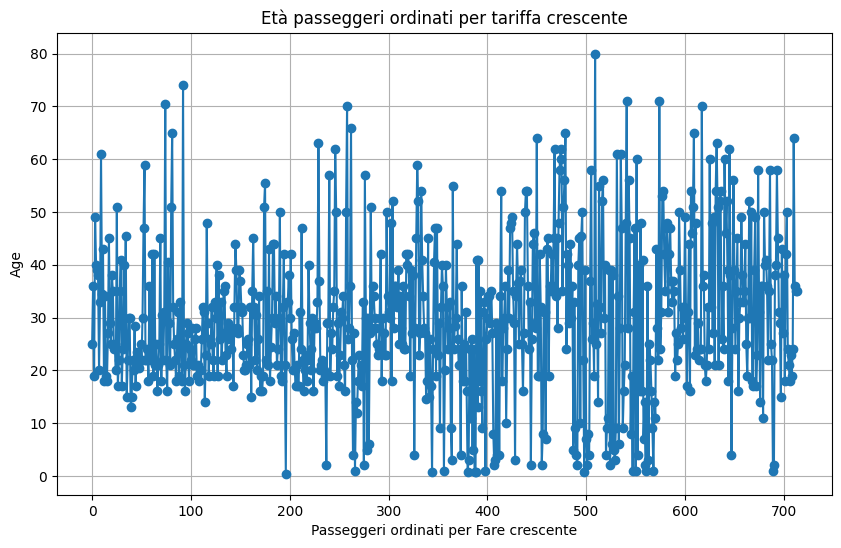

In [ ]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', header = 0)
titanic
titanic = titanic.dropna(subset=['Fare', 'Age'])

#print(titanic.sort_values('Fare',  ascending=False).head(10))

print(np.mean(titanic['Age']))
print(np.mean(titanic['Fare']))
print(np.mean(titanic['SibSp']))

titanic['Family_index'] = (titanic['SibSp'] + titanic['Parch'] ) / titanic['Fare']
#print(titanic)

print(titanic.sort_values('Family_index',  ascending=False).head(1))

titanic[titanic['Fare'] > 100]

top10_fare = titanic.sort_values('Fare', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_fare['Name'], top10_fare['Fare'], color='skyblue')
plt.xticks(rotation=75, ha='right')
plt.title("I 10 passeggeri che hanno pagato di più")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

sorted_by_fare = titanic.sort_values('Fare')

plt.figure(figsize=(10,6))
plt.plot(sorted_by_fare['Age'].values, marker='o')
plt.title("Età passeggeri ordinati per tariffa crescente")
plt.xlabel("Passeggeri ordinati per Fare crescente")
plt.ylabel("Age")
plt.grid(True)
plt.show()



In [ ]:
import numpy as np

np.random.seed(42)

a = np.random.normal(loc=0, scale=1, size=(5, 9))

for i in range(5):
    min = abs(a[i, 0])
    for j in range(9):
        if abs(a[i, j]) < min:
            min = abs(a[i, j])
    x[i] = min

print("Array a:\n", a)
print("\nMinimi valori assoluti per riga:\n", x)


Array a:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]

Minimi valori assoluti per riga:
 [0.1382643  0.24196227 0.0675282  0.01349722 0.11564828]


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


344 7
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
168
165
0
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


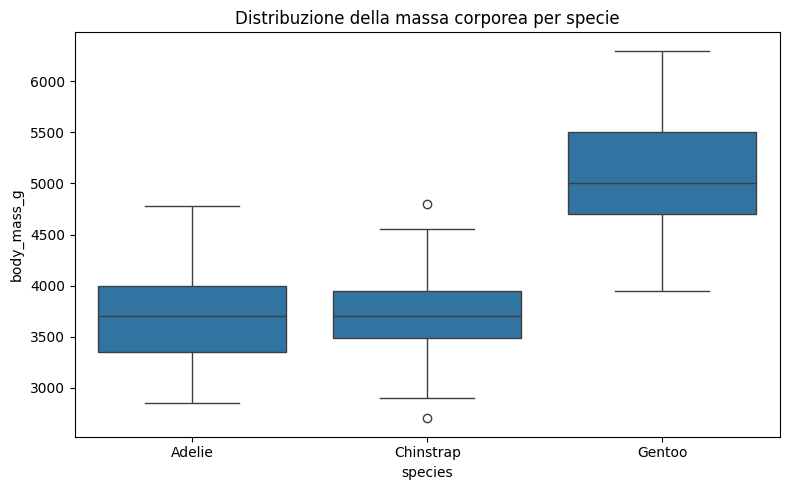

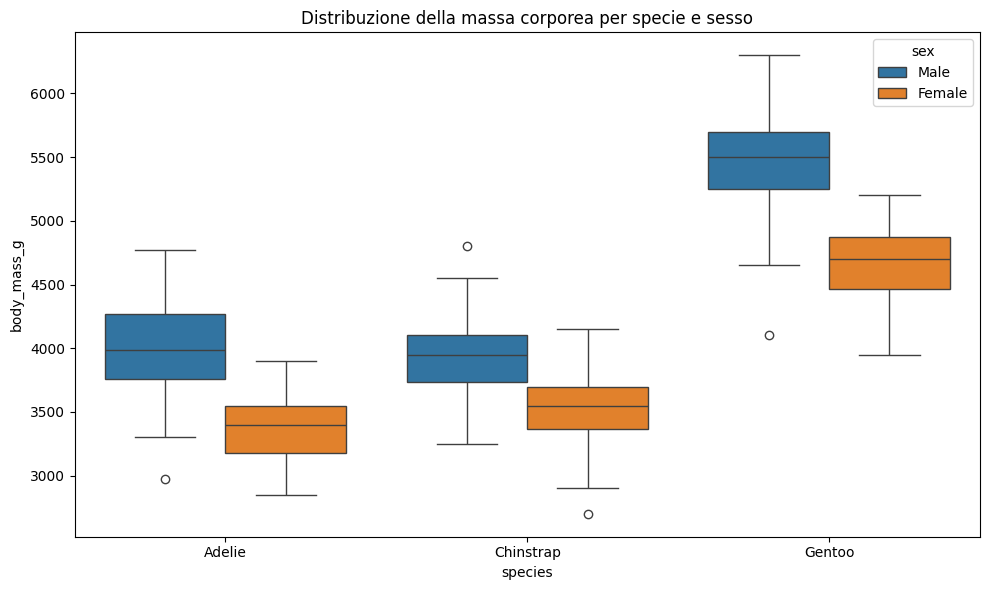

In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

import numpy as np
import matplotlib.pyplot as plt


#1
print(penguins.shape[0], penguins.shape[1])

#2
print(penguins.isna().sum())

#3
print((penguins['sex'] == 'Male').sum())
print((penguins['sex'] == 'Female').sum())
#Male > Female
penguins['sex'] = penguins['sex'].fillna('Male')

# 4
penguins = penguins.dropna(subset=['body_mass_g'])

# 5
print(penguins.duplicated().sum())

# 6
print(penguins.groupby('species')['body_mass_g'].mean())


# 7.
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='body_mass_g', data=penguins)
plt.title("Distribuzione della massa corporea per specie")
plt.tight_layout()
plt.show()

# 8. Distribuzione massa corporea per specie e sesso
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=penguins)
plt.title("Distribuzione della massa corporea per specie e sesso")
plt.tight_layout()
plt.show()



## Esercizio 6

crivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.

( 3.0 , 2.06 , y = 3.00 * x + 2.06 )


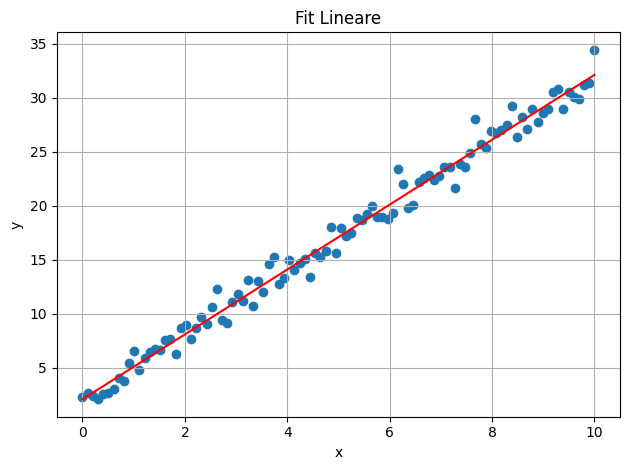

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

def line(x, a, b):
    return a * x + b


def fit_line(x, y):
    popt, _ = curve_fit(line, x, y)
    a, b = popt
    equation = f"y = {a:.2f} * x + {b:.2f}"
    return a, b, equation

a, b, eq = fit_line(x, y)
print('(',a.round(2),',',b.round(2),',', eq, ')')


plt.scatter(x, y)
plt.plot(x, a * x + b, 'r-')
plt.title("Fit Lineare")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()
